In [1]:
import pycaret
import pandas as pd

In [2]:
#preprocess the data before feeding it to pycaret
df = pd.read_csv("final_features.csv")
gilani = pd.read_csv("gilani-2017.tsv", header = None, sep="\t")
creski = pd.read_csv("cresci-rtbust-2019.tsv", header = None, sep="\t")
df.drop(columns = {"Unnamed: 0.1",'Unnamed: 0'}, inplace =True)
bot_not = pd.concat([gilani,creski])
bot_not.reset_index(drop= True, inplace=True)
bot_not.rename(columns={0:'id',1:'status'},inplace =True)
df = df.merge(bot_not, left_on='User_id', right_on='id')
df.drop(columns='id',inplace=True)
df.drop(columns = "degree", inplace = True)
df.drop(columns = "degreeIn", inplace = True)
df1=df.copy()#for later use since pycaret changes the original df

In [3]:
# compare machine learning algorithms on the sonar classification dataset
from pandas import read_csv
from pycaret.classification import setup
from pycaret.classification import compare_models
# load the dataset
# set column names as the column number
n_cols = df.shape[1]
df.columns = [str(i) for i in range(n_cols)]
# setup the dataset
grid = setup(data=df, target=df.columns[-1], html=False, silent=True, verbose=False)
# evaluate models and compare models
best = compare_models()
# report the best model
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.4026,0.51,0.1,0.0619,0.0765,0.0,0.0,0.922


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5884,0.5669,0.7604,0.6427,0.6964,0.0705,0.0728,0.251
lr,Logistic Regression,0.4026,0.5100,0.1000,0.0619,0.0765,0.0000,0.0000,0.922


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6232,0.5083,0.9681,0.6275,0.7614,0.0307,0.0595,0.018
knn,K Neighbors Classifier,0.5884,0.5669,0.7604,0.6427,0.6964,0.0705,0.0728,0.251
lr,Logistic Regression,0.4026,0.5100,0.1000,0.0619,0.0765,0.0000,0.0000,0.922


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6805,0.6595,0.7484,0.7410,0.7441,0.3185,0.3193,0.041
nb,Naive Bayes,0.6232,0.5083,0.9681,0.6275,0.7614,0.0307,0.0595,0.018
knn,K Neighbors Classifier,0.5884,0.5669,0.7604,0.6427,0.6964,0.0705,0.0728,0.251
lr,Logistic Regression,0.4026,0.5100,0.1000,0.0619,0.0765,0.0000,0.0000,0.922


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6805,0.6595,0.7484,0.7410,0.7441,0.3185,0.3193,0.041
nb,Naive Bayes,0.6232,0.5083,0.9681,0.6275,0.7614,0.0307,0.0595,0.018
knn,K Neighbors Classifier,0.5884,0.5669,0.7604,0.6427,0.6964,0.0705,0.0728,0.251
svm,SVM - Linear Kernel,0.4265,0.0000,0.2000,0.1238,0.1529,0.0000,0.0000,0.021
lr,Logistic Regression,0.4026,0.5100,0.1000,0.0619,0.0765,0.0000,0.0000,0.922


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7427,0.0000,0.8473,0.7646,0.8033,0.4338,0.4402,0.018
dt,Decision Tree Classifier,0.6805,0.6595,0.7484,0.7410,0.7441,0.3185,0.3193,0.041
nb,Naive Bayes,0.6232,0.5083,0.9681,0.6275,0.7614,0.0307,0.0595,0.018
knn,K Neighbors Classifier,0.5884,0.5669,0.7604,0.6427,0.6964,0.0705,0.0728,0.251
svm,SVM - Linear Kernel,0.4265,0.0000,0.2000,0.1238,0.1529,0.0000,0.0000,0.021
lr,Logistic Regression,0.4026,0.5100,0.1000,0.0619,0.0765,0.0000,0.0000,0.922


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7645,0.7939,0.8747,0.7753,0.8216,0.4785,0.4879,0.156
ridge,Ridge Classifier,0.7427,0.0000,0.8473,0.7646,0.8033,0.4338,0.4402,0.018
dt,Decision Tree Classifier,0.6805,0.6595,0.7484,0.7410,0.7441,0.3185,0.3193,0.041
nb,Naive Bayes,0.6232,0.5083,0.9681,0.6275,0.7614,0.0307,0.0595,0.018
knn,K Neighbors Classifier,0.5884,0.5669,0.7604,0.6427,0.6964,0.0705,0.0728,0.251
svm,SVM - Linear Kernel,0.4265,0.0000,0.2000,0.1238,0.1529,0.0000,0.0000,0.021
lr,Logistic Regression,0.4026,0.5100,0.1000,0.0619,0.0765,0.0000,0.0000,0.922


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7645,0.7939,0.8747,0.7753,0.8216,0.4785,0.4879,0.156
ridge,Ridge Classifier,0.7427,0.0000,0.8473,0.7646,0.8033,0.4338,0.4402,0.018
dt,Decision Tree Classifier,0.6805,0.6595,0.7484,0.7410,0.7441,0.3185,0.3193,0.041
qda,Quadratic Discriminant Analysis,0.6300,0.5997,0.8923,0.6471,0.7482,0.1048,0.1444,0.029
nb,Naive Bayes,0.6232,0.5083,0.9681,0.6275,0.7614,0.0307,0.0595,0.018
knn,K Neighbors Classifier,0.5884,0.5669,0.7604,0.6427,0.6964,0.0705,0.0728,0.251
svm,SVM - Linear Kernel,0.4265,0.0000,0.2000,0.1238,0.1529,0.0000,0.0000,0.021
lr,Logistic Regression,0.4026,0.5100,0.1000,0.0619,0.0765,0.0000,0.0000,0.922


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7645,0.7939,0.8747,0.7753,0.8216,0.4785,0.4879,0.156
ada,Ada Boost Classifier,0.7509,0.7840,0.8418,0.7770,0.8073,0.4559,0.4606,0.196
ridge,Ridge Classifier,0.7427,0.0000,0.8473,0.7646,0.8033,0.4338,0.4402,0.018
dt,Decision Tree Classifier,0.6805,0.6595,0.7484,0.7410,0.7441,0.3185,0.3193,0.041
qda,Quadratic Discriminant Analysis,0.6300,0.5997,0.8923,0.6471,0.7482,0.1048,0.1444,0.029
nb,Naive Bayes,0.6232,0.5083,0.9681,0.6275,0.7614,0.0307,0.0595,0.018
knn,K Neighbors Classifier,0.5884,0.5669,0.7604,0.6427,0.6964,0.0705,0.0728,0.251
svm,SVM - Linear Kernel,0.4265,0.0000,0.2000,0.1238,0.1529,0.0000,0.0000,0.021
lr,Logistic Regression,0.4026,0.5100,0.1000,0.0619,0.0765,0.0000,0.0000,0.922


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7843,0.8185,0.8857,0.7933,0.8363,0.5227,0.5319,0.708
rf,Random Forest Classifier,0.7645,0.7939,0.8747,0.7753,0.8216,0.4785,0.4879,0.156
ada,Ada Boost Classifier,0.7509,0.7840,0.8418,0.7770,0.8073,0.4559,0.4606,0.196
ridge,Ridge Classifier,0.7427,0.0000,0.8473,0.7646,0.8033,0.4338,0.4402,0.018
dt,Decision Tree Classifier,0.6805,0.6595,0.7484,0.7410,0.7441,0.3185,0.3193,0.041
qda,Quadratic Discriminant Analysis,0.6300,0.5997,0.8923,0.6471,0.7482,0.1048,0.1444,0.029
nb,Naive Bayes,0.6232,0.5083,0.9681,0.6275,0.7614,0.0307,0.0595,0.018
knn,K Neighbors Classifier,0.5884,0.5669,0.7604,0.6427,0.6964,0.0705,0.0728,0.251
svm,SVM - Linear Kernel,0.4265,0.0000,0.2000,0.1238,0.1529,0.0000,0.0000,0.021
lr,Logistic Regression,0.4026,0.5100,0.1000,0.0619,0.0765,0.0000,0.0000,0.922


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7843,0.8185,0.8857,0.7933,0.8363,0.5227,0.5319,0.708
rf,Random Forest Classifier,0.7645,0.7939,0.8747,0.7753,0.8216,0.4785,0.4879,0.156
ada,Ada Boost Classifier,0.7509,0.7840,0.8418,0.7770,0.8073,0.4559,0.4606,0.196
lda,Linear Discriminant Analysis,0.7434,0.7729,0.8451,0.7663,0.8032,0.4364,0.4425,0.035
ridge,Ridge Classifier,0.7427,0.0000,0.8473,0.7646,0.8033,0.4338,0.4402,0.018
dt,Decision Tree Classifier,0.6805,0.6595,0.7484,0.7410,0.7441,0.3185,0.3193,0.041
qda,Quadratic Discriminant Analysis,0.6300,0.5997,0.8923,0.6471,0.7482,0.1048,0.1444,0.029
nb,Naive Bayes,0.6232,0.5083,0.9681,0.6275,0.7614,0.0307,0.0595,0.018
knn,K Neighbors Classifier,0.5884,0.5669,0.7604,0.6427,0.6964,0.0705,0.0728,0.251
svm,SVM - Linear Kernel,0.4265,0.0000,0.2000,0.1238,0.1529,0.0000,0.0000,0.021


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7843,0.8185,0.8857,0.7933,0.8363,0.5227,0.5319,0.708
rf,Random Forest Classifier,0.7645,0.7939,0.8747,0.7753,0.8216,0.4785,0.4879,0.156
et,Extra Trees Classifier,0.7570,0.7967,0.8912,0.7595,0.8199,0.4534,0.4687,0.103
ada,Ada Boost Classifier,0.7509,0.7840,0.8418,0.7770,0.8073,0.4559,0.4606,0.196
lda,Linear Discriminant Analysis,0.7434,0.7729,0.8451,0.7663,0.8032,0.4364,0.4425,0.035
ridge,Ridge Classifier,0.7427,0.0000,0.8473,0.7646,0.8033,0.4338,0.4402,0.018
dt,Decision Tree Classifier,0.6805,0.6595,0.7484,0.7410,0.7441,0.3185,0.3193,0.041
qda,Quadratic Discriminant Analysis,0.6300,0.5997,0.8923,0.6471,0.7482,0.1048,0.1444,0.029
nb,Naive Bayes,0.6232,0.5083,0.9681,0.6275,0.7614,0.0307,0.0595,0.018
knn,K Neighbors Classifier,0.5884,0.5669,0.7604,0.6427,0.6964,0.0705,0.0728,0.251


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7843,0.8185,0.8857,0.7933,0.8363,0.5227,0.5319,0.708
lightgbm,Light Gradient Boosting Machine,0.7802,0.8071,0.8813,0.7911,0.8329,0.5141,0.5232,0.244
rf,Random Forest Classifier,0.7645,0.7939,0.8747,0.7753,0.8216,0.4785,0.4879,0.156
et,Extra Trees Classifier,0.7570,0.7967,0.8912,0.7595,0.8199,0.4534,0.4687,0.103
ada,Ada Boost Classifier,0.7509,0.7840,0.8418,0.7770,0.8073,0.4559,0.4606,0.196
lda,Linear Discriminant Analysis,0.7434,0.7729,0.8451,0.7663,0.8032,0.4364,0.4425,0.035
ridge,Ridge Classifier,0.7427,0.0000,0.8473,0.7646,0.8033,0.4338,0.4402,0.018
dt,Decision Tree Classifier,0.6805,0.6595,0.7484,0.7410,0.7441,0.3185,0.3193,0.041
qda,Quadratic Discriminant Analysis,0.6300,0.5997,0.8923,0.6471,0.7482,0.1048,0.1444,0.029
nb,Naive Bayes,0.6232,0.5083,0.9681,0.6275,0.7614,0.0307,0.0595,0.018


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7843,0.8185,0.8857,0.7933,0.8363,0.5227,0.5319,0.708
lightgbm,Light Gradient Boosting Machine,0.7802,0.8071,0.8813,0.7911,0.8329,0.5141,0.5232,0.244
rf,Random Forest Classifier,0.7645,0.7939,0.8747,0.7753,0.8216,0.4785,0.4879,0.156
et,Extra Trees Classifier,0.7570,0.7967,0.8912,0.7595,0.8199,0.4534,0.4687,0.103
ada,Ada Boost Classifier,0.7509,0.7840,0.8418,0.7770,0.8073,0.4559,0.4606,0.196
lda,Linear Discriminant Analysis,0.7434,0.7729,0.8451,0.7663,0.8032,0.4364,0.4425,0.035
ridge,Ridge Classifier,0.7427,0.0000,0.8473,0.7646,0.8033,0.4338,0.4402,0.018
dt,Decision Tree Classifier,0.6805,0.6595,0.7484,0.7410,0.7441,0.3185,0.3193,0.041
qda,Quadratic Discriminant Analysis,0.6300,0.5997,0.8923,0.6471,0.7482,0.1048,0.1444,0.029
nb,Naive Bayes,0.6232,0.5083,0.9681,0.6275,0.7614,0.0307,0.0595,0.018


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7843,0.8185,0.8857,0.7933,0.8363,0.5227,0.5319,0.708
lightgbm,Light Gradient Boosting Machine,0.7802,0.8071,0.8813,0.7911,0.8329,0.5141,0.5232,0.244
rf,Random Forest Classifier,0.7645,0.7939,0.8747,0.7753,0.8216,0.4785,0.4879,0.156
et,Extra Trees Classifier,0.7570,0.7967,0.8912,0.7595,0.8199,0.4534,0.4687,0.103
ada,Ada Boost Classifier,0.7509,0.7840,0.8418,0.7770,0.8073,0.4559,0.4606,0.196
lda,Linear Discriminant Analysis,0.7434,0.7729,0.8451,0.7663,0.8032,0.4364,0.4425,0.035
ridge,Ridge Classifier,0.7427,0.0000,0.8473,0.7646,0.8033,0.4338,0.4402,0.018
dt,Decision Tree Classifier,0.6805,0.6595,0.7484,0.7410,0.7441,0.3185,0.3193,0.041
qda,Quadratic Discriminant Analysis,0.6300,0.5997,0.8923,0.6471,0.7482,0.1048,0.1444,0.029
nb,Naive Bayes,0.6232,0.5083,0.9681,0.6275,0.7614,0.0307,0.0595,0.018


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1970, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.7558,0.9341,0.7456,0.8293,0.4519,0.4844
1,0.8639,0.8609,0.9231,0.8660,0.8936,0.7055,0.7082
2,0.7755,0.7843,0.8791,0.7843,0.8290,0.5054,0.5124
3,0.7755,0.8052,0.8352,0.8085,0.8216,0.5191,0.5196
4,0.7415,0.7955,0.8901,0.7431,0.8100,0.4158,0.4327
5,0.7740,0.8158,0.8352,0.8085,0.8216,0.5134,0.5139
6,0.7808,0.8202,0.8681,0.7980,0.8316,0.5194,0.5232
7,0.8151,0.8430,0.9121,0.8137,0.8601,0.5900,0.5984
8,0.7877,0.8558,0.8901,0.7941,0.8394,0.5292,0.5368


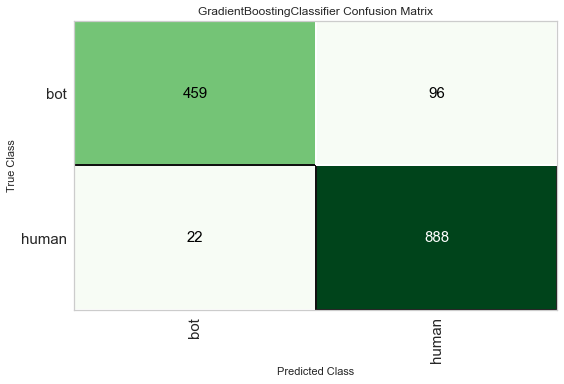

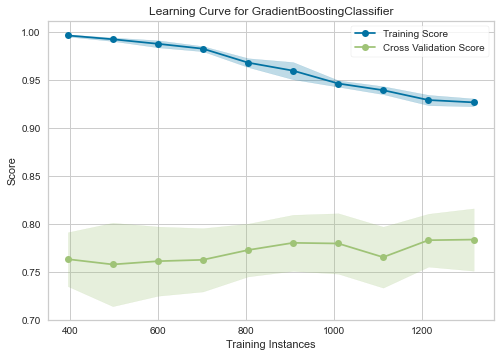

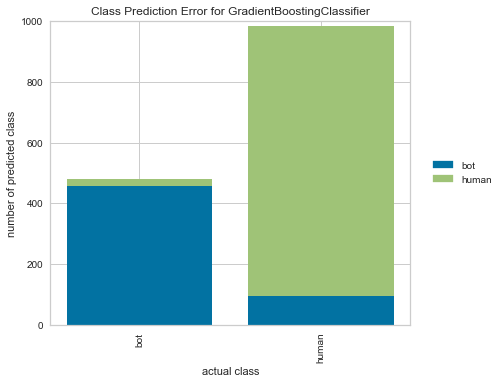

In [4]:
from pycaret.classification import *
gbc = create_model('gbc')
plot_model(gbc, plot = 'confusion_matrix', use_train_data = True)

plot_model(gbc, plot = 'learning', use_train_data = True)

plot_model(gbc,plot="error",use_train_data=True)

## Feature Importance

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
#Use this class to label encode multiple classes at once 
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [6]:
df1

,User_id,protected,followers_count,friends_count,listed_count,favourites_count,geo_enabled,verified,statuses_count,lang,...,Std_day,Skew_day,Kyrt_day,Entropy_day,Q1_day,Q3_day,mentions,neighbors,degreeOut,status
0,6.135120e+08,False,121500,346,532,35894,True,False,21246,en,...,7.477858,0.284134,-1.310917,1.945910,21.5,33.5,93,73,93,human
1,1.926398e+07,False,3227215,1946,9039,16134,True,True,45791,en,...,11.106167,-0.978557,0.509374,1.945910,27.5,33.5,195,80,195,human
2,5.506100e+08,False,951,275,9,22147,True,False,88862,en,...,10.402119,-0.073946,-1.112115,1.945910,21.0,35.5,189,135,189,human
3,1.497146e+08,False,1412,623,12,5582,True,False,142073,en,...,12.791898,-0.493307,-1.219980,1.747868,20.5,38.5,122,77,122,human
4,7.694399e+07,False,1615,182,27,34629,True,False,85419,es,...,12.532407,-0.011864,-1.264797,1.945910,18.5,37.5,123,88,123,human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,4.770148e+08,False,12772,13140,42,44510,True,False,89713,en,...,9.145089,1.070635,0.101125,1.945910,22.5,32.0,167,145,167,human
2089,2.982573e+09,False,152,46,0,1002,True,False,2134,it,...,53.611604,1.867110,1.729060,1.153742,2.0,18.5,251,78,251,bot
2090,8.256987e+17,False,301,863,0,546,False,False,3938,it,...,41.664354,1.163739,-0.348898,1.549826,2.0,40.0,416,52,416,bot
2091,7.267557e+17,False,134,155,1,13631,True,False,12439,it,...,13.530012,0.405850,-0.924289,1.747868,16.5,35.5,184,113,184,human


In [7]:
df_new = MultiColumnLabelEncoder(columns =['protected','geo_enabled',"verified",'lang',
                                           "is_translation_enabled","profile_background_tile",
                                           "has_extended_profile","default_profile","following",
                                           "follow_request_sent","translator_type",
                                           "Uses_default_profile_image_url",
                                           "not_using_unique_description",'status']).fit_transform(df1) #label encode all of the selected columns
df_new.drop(columns=['Datetime'],inplace =True) #drop datetime since its not used
import numpy as np
df_new = df_new[~df_new.isin([np.nan, np.inf, -np.inf]).any(1)] #drop nan or inf values

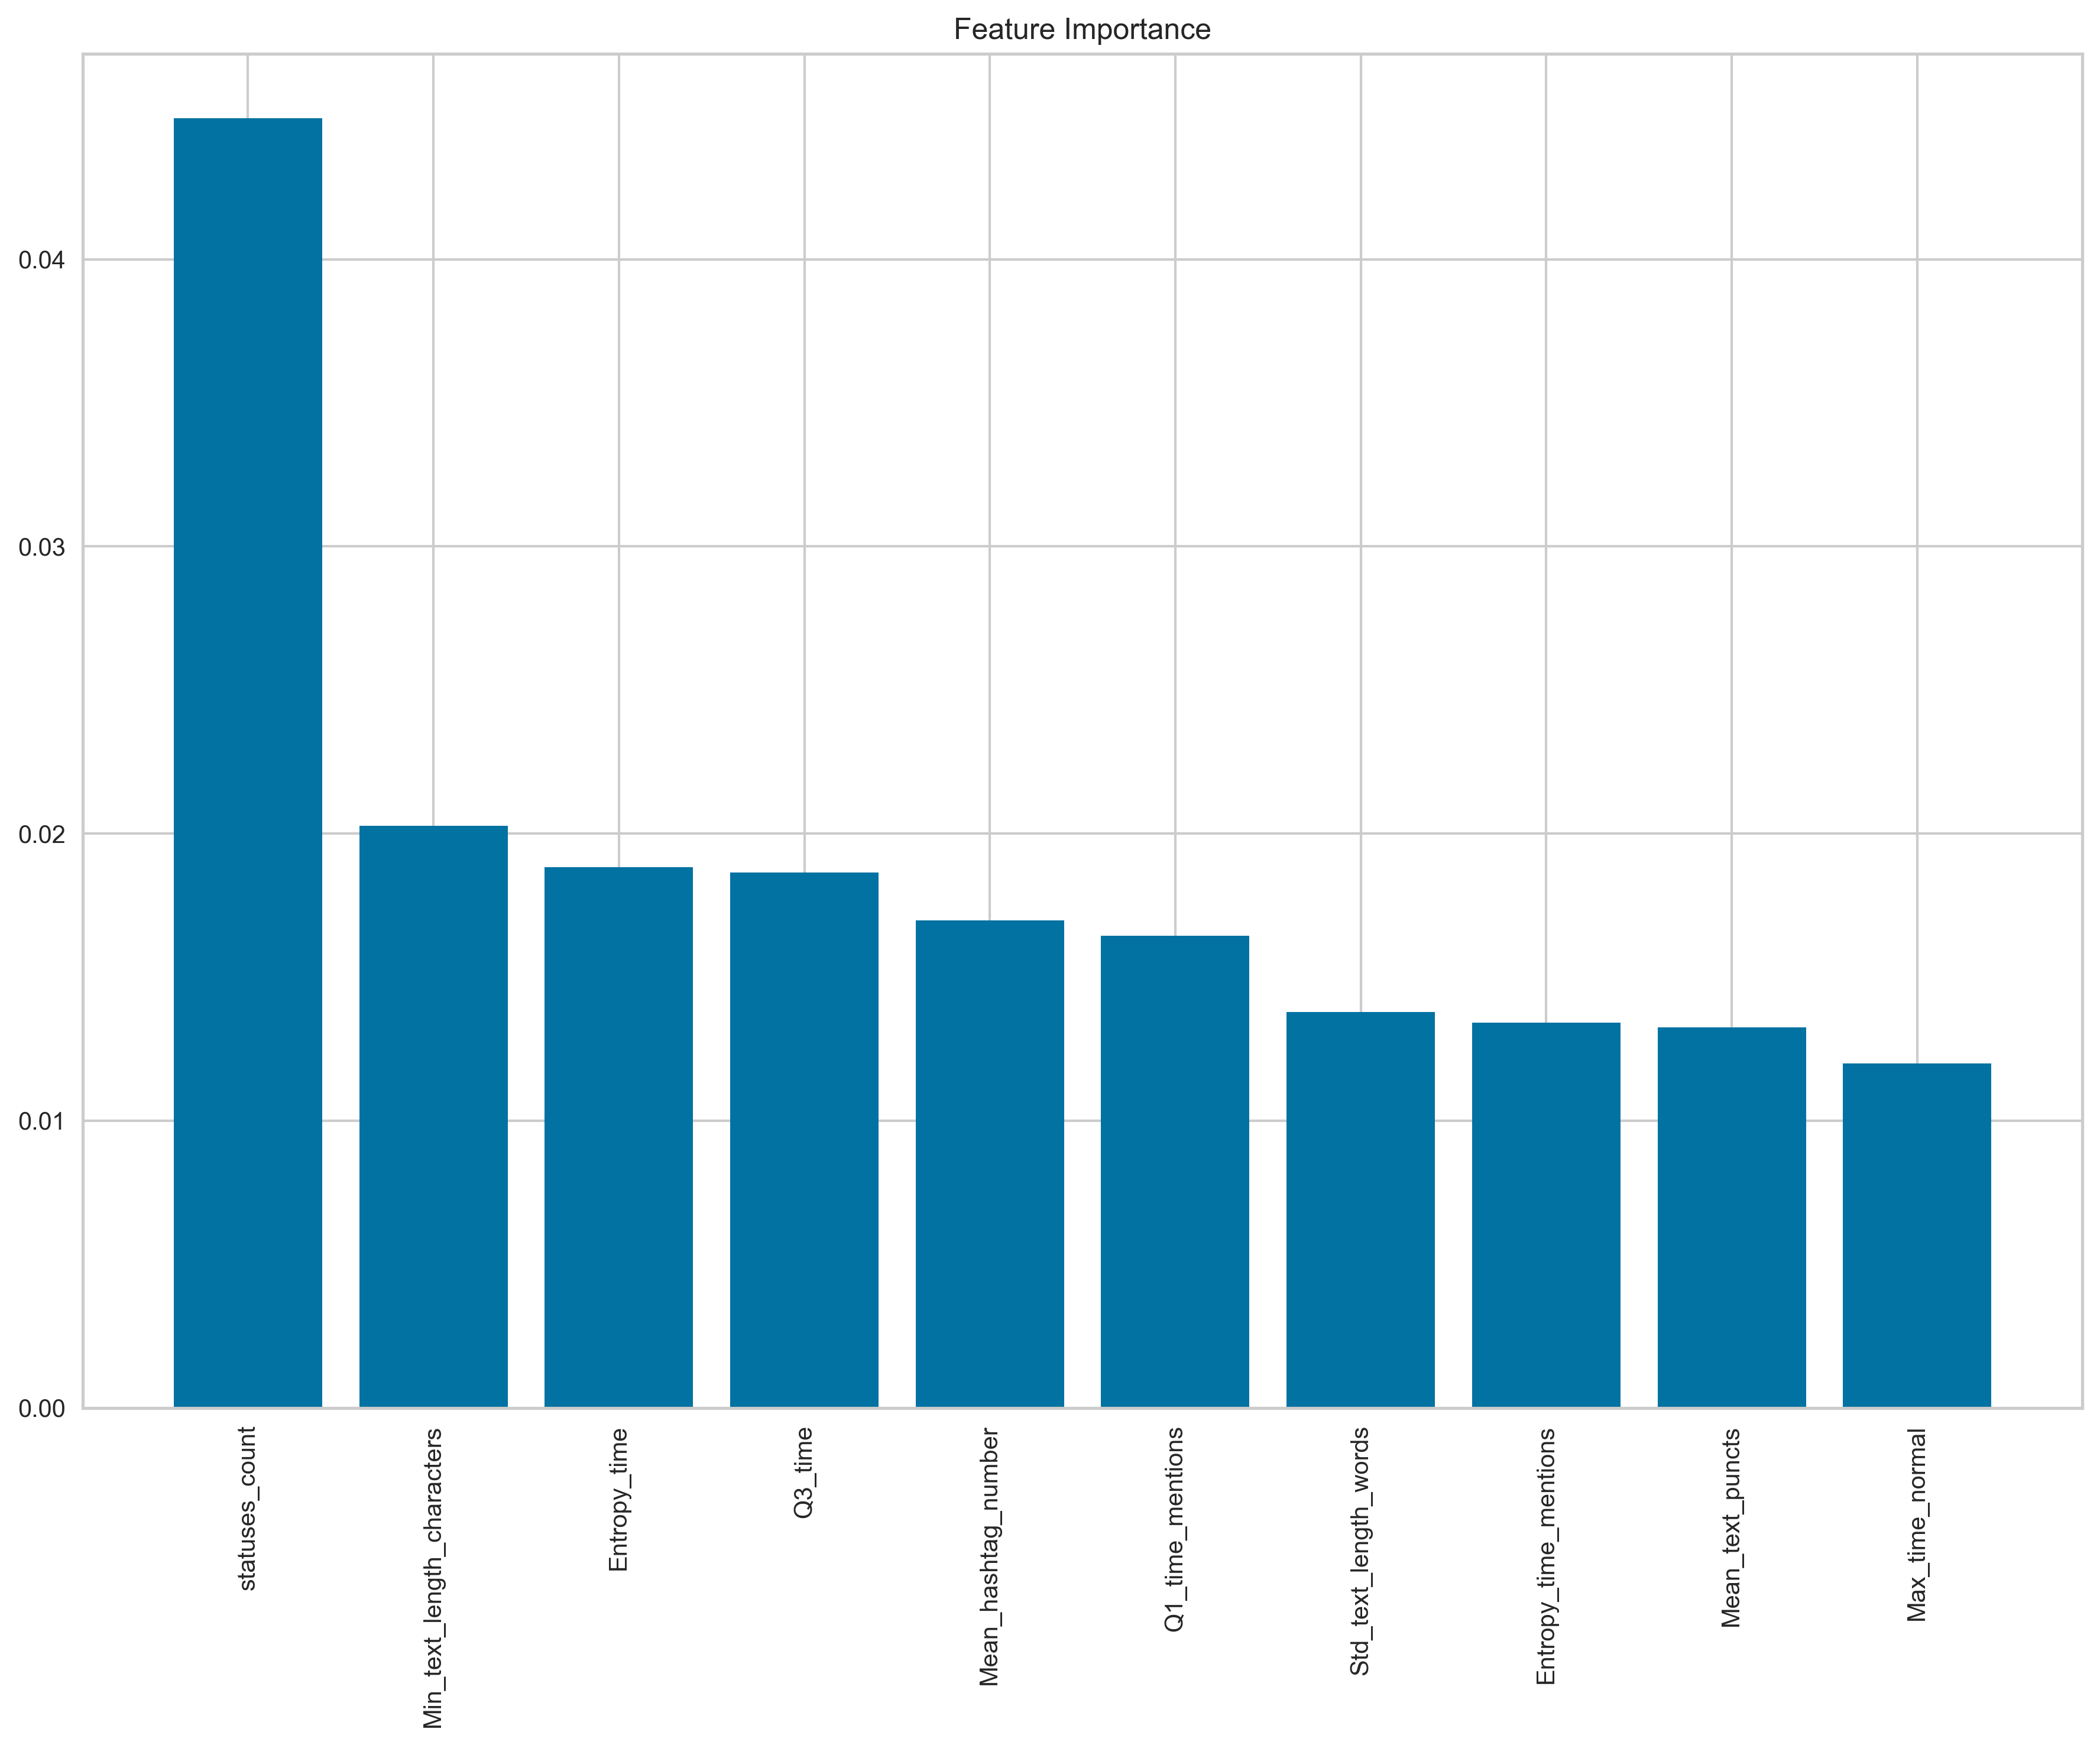

In [8]:
from sklearn.model_selection import train_test_split

df = df_new

# Create training and test split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1:], test_size = 0.25, random_state=1)

# Feature scaling


# Training / Test Dataframe

from sklearn.ensemble import RandomForestClassifier

# Train the mode

forest = RandomForestClassifier()
forest.fit(X_train, y_train.values.ravel())

importances = forest.feature_importances_

# Sort the feature importance in descending order

sorted_indices = np.argsort(importances)[::-1]

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12, 10), dpi=300)
plt.title('Feature Importance')
plt.bar(range(10), importances[sorted_indices][0:10], align='center')
plt.xticks(range(10), X_train.columns[sorted_indices][0:10], rotation=90)
plt.tight_layout()
plt.show()

# Unsupervised Learning

0.9246462803772783


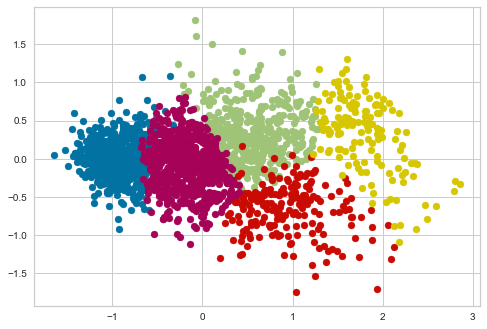

Silhouette Score: 0.27276073296750825


In [9]:
import pandas as pd
import numpy as np
from numpy import unique, where
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Feature Selection for grouping the users by activity (select only )
X = df_new[["Min_time", "Max_time","Mean_time", 
            "Median_time", "Std_time", "Skew_time",
            "Kyrt_time", "Entropy_time", "Q1_time", "Q3_time",
           "Min_time_rt", "Max_time_rt","Mean_time_rt", 
            "Median_time_rt", "Std_time_rt", "Skew_time_rt",
            "Kyrt_time_rt", "Entropy_time_rt", "Q1_time_rt", "Q3_time_rt",
           "Min_time_normal", "Max_time_normal","Mean_time_normal", 
            "Median_time_normal", "Std_time_normal", "Skew_time_normal",
            "Kyrt_time_normal", "Entropy_time_normal", "Q1_time_normal", "Q3_time_normal",
           "Min_time_mentions", "Max_time_mentions","Mean_time_mentions", 
            "Median_time_mentions", "Std_time_mentions", "Skew_time_mentions",
            "Kyrt_time_mentions", "Entropy_time_mentions", "Q1_time_mentions", "Q3_time_mentions",
           "Min_hour", "Max_hour","Mean_hour", 
            "Median_hour", "Std_hour", "Skew_hour",
            "Kyrt_hour", "Entropy_hour", "Q1_hour", "Q3_hour",
           "Min_day", "Max_day","Mean_day", 
            "Median_day", "Std_day", "Skew_day",
            "Kyrt_day", "Entropy_day", "Q1_day", "Q3_day"]].values


#Preprocessing
#Scale the data
scaler = MinMaxScaler()
x = scaler.fit_transform(X)

#Apply principal component analysis
pca = PCA(n_components=16)
x = pca.fit_transform(x)
#Print the percentage of variance explained by the selected components.
print(sum(pca.explained_variance_ratio_))

#Apply k-means using 5 clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 1000, n_init = 100, random_state = 0)
kmeans.fit(x)
yhat = kmeans.predict(x)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(x[row_ix, 0], x[row_ix,1])
    
# show the plot
plt.show()
print(f'Silhouette Score: {silhouette_score(x, yhat, metric="sqeuclidean")}')

In [10]:
#Select only features that refer to mean and median time between consecutive posts
column_name = ['time']
X = df_new[["Mean_"+column_name[0], "Median_"+column_name[0]]].values

#Preprocessing - scale the data
scaler = MinMaxScaler()
x = scaler.fit_transform(X)

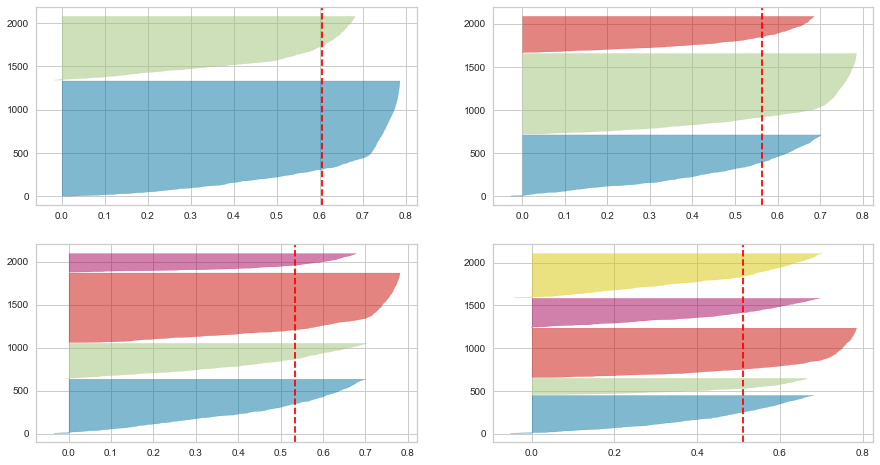

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])

    visualizer.fit(x)

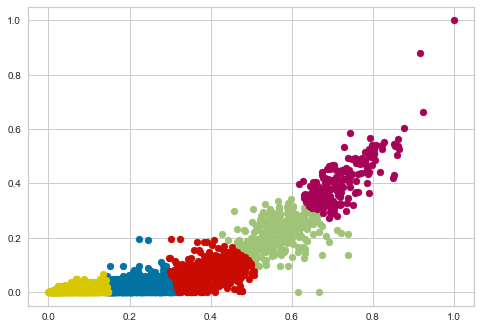

Silhouette Score: 0.6814942211433013


In [12]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 1000, n_init = 100, random_state = 0)
kmeans.fit(x)
yhat = kmeans.predict(x)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(x[row_ix, 0], x[row_ix,1])
# show the plot
plt.show()
print(f'Silhouette Score: {silhouette_score(x, yhat, metric="sqeuclidean")}')

# Real Users

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
#preprocess data from real accounts
test_data = pd.read_csv('final_features_real.csv')
test_data.drop(columns = {"Unnamed: 0.1",'Unnamed: 0'}, inplace =True)
new_test = pd.DataFrame(test_data, columns=range(164))
new_test.dropna(inplace=True)
new_test
test_data.columns=new_test.columns.values


In [15]:
#Create the models to test on the real accounts
gbc = create_model('gbc')
lightgbm = create_model('lightgbm')
rf = create_model('rf')
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.7558,0.9341,0.7456,0.8293,0.4519,0.4844
1,0.8639,0.8609,0.9231,0.8660,0.8936,0.7055,0.7082
2,0.7755,0.7843,0.8791,0.7843,0.8290,0.5054,0.5124
3,0.7755,0.8052,0.8352,0.8085,0.8216,0.5191,0.5196
4,0.7415,0.7955,0.8901,0.7431,0.8100,0.4158,0.4327
5,0.7740,0.8158,0.8352,0.8085,0.8216,0.5134,0.5139
6,0.7808,0.8202,0.8681,0.7980,0.8316,0.5194,0.5232
7,0.8151,0.8430,0.9121,0.8137,0.8601,0.5900,0.5984
8,0.7877,0.8558,0.8901,0.7941,0.8394,0.5292,0.5368


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7687,0.7493,0.9341,0.7522,0.8333,0.4695,0.4999
1,0.8435,0.8573,0.9121,0.8469,0.8783,0.6601,0.6637
2,0.7687,0.7834,0.8901,0.7714,0.8265,0.4848,0.4961
3,0.8027,0.8052,0.8681,0.8229,0.8449,0.5744,0.5760
4,0.7143,0.7686,0.8681,0.7248,0.7900,0.3543,0.3687
5,0.7671,0.7928,0.8242,0.8065,0.8152,0.5005,0.5007
6,0.7808,0.7954,0.8791,0.7921,0.8333,0.5159,0.5219
7,0.8151,0.8214,0.9231,0.8077,0.8615,0.5869,0.5988
8,0.7740,0.8421,0.8242,0.8152,0.8197,0.5169,0.5170


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7347,0.7225,0.8791,0.7407,0.8040,0.4026,0.4170
1,0.8027,0.8436,0.9341,0.7870,0.8543,0.5558,0.5757
2,0.7415,0.7507,0.8901,0.7431,0.8100,0.4158,0.4327
3,0.8095,0.8065,0.8901,0.8182,0.8526,0.5847,0.5889
4,0.7415,0.7784,0.8681,0.7524,0.8061,0.4242,0.4341
5,0.7260,0.7729,0.8022,0.7684,0.7849,0.4081,0.4088
6,0.6986,0.7695,0.7802,0.7474,0.7634,0.3489,0.3495
7,0.8014,0.8236,0.9011,0.8039,0.8497,0.5596,0.5676
8,0.7877,0.8303,0.8901,0.7941,0.8394,0.5292,0.5368


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7279,0.7458,0.8352,0.7525,0.7917,0.4026,0.4071
1,0.8299,0.8558,0.9011,0.8367,0.8677,0.6305,0.6339
2,0.7415,0.7327,0.8571,0.7573,0.8041,0.4284,0.4355
3,0.7415,0.8109,0.8132,0.7789,0.7957,0.4443,0.4451
4,0.7007,0.7502,0.8352,0.7238,0.7755,0.3333,0.3411
5,0.7123,0.7838,0.7473,0.7816,0.7640,0.3961,0.3968
6,0.7534,0.7862,0.8681,0.7670,0.8144,0.4512,0.4590
7,0.7945,0.7768,0.9011,0.7961,0.8454,0.5427,0.5520
8,0.7603,0.8169,0.8022,0.8111,0.8066,0.4913,0.4914


In [16]:
#get results from each model
from sklearn import preprocessing, metrics
status = [0,0,1,1,1,1,1,0,1,1,1,0]#1 human 0 bot
         
le = preprocessing.LabelEncoder()
#label encode the status 
gbc_pred = predict_model(gbc,test_data)
gbc_pred
gbc_pred['Label'] = le.fit_transform(gbc_pred['Label'])

y_test = status
y_predicted = gbc_pred['Label']
#get the metrics
ac1= metrics.accuracy_score(y_test, y_predicted)
p1 = metrics.precision_score(y_test, y_predicted, average ='macro')
r1 = metrics.recall_score(y_test, y_predicted,average ='macro')
f1 = metrics.f1_score(y_test, y_predicted,average ='macro')
print("Accuracy",  ac1)
print("Precision", p1 )
print("Recall",r1)
print("F1", f1)

Accuracy 0.5833333333333334
Precision 0.6142857142857143
Recall 0.625
F1 0.5804195804195804


In [17]:
lg_pred = predict_model(lightgbm,test_data)
lg_pred['Label'] = le.fit_transform(lg_pred['Label'])

y_test = status
y_predicted = lg_pred['Label']
ac2= metrics.accuracy_score(y_test, y_predicted)
p2 = metrics.precision_score(y_test, y_predicted, average ='macro')
r2 = metrics.recall_score(y_test, y_predicted,average ='macro')
f2 = metrics.f1_score(y_test, y_predicted,average ='macro')
print("Accuracy",  ac2)
print("Precision", p2 )
print("Recall",r2)
print("F1", f2)

Accuracy 0.6666666666666666
Precision 0.6666666666666667
Recall 0.6875
F1 0.6571428571428571


In [18]:

rf_pred = predict_model(rf,test_data)
rf_pred['Label'] = le.fit_transform(rf_pred['Label'])

y_test = status
y_predicted = rf_pred['Label']
ac3= metrics.accuracy_score(y_test, y_predicted)
p3 = metrics.precision_score(y_test, y_predicted, average ='macro')
r3 = metrics.recall_score(y_test, y_predicted,average ='macro')
f3 = metrics.f1_score(y_test, y_predicted,average ='macro')
print("Accuracy",  ac3)
print("Precision", p3 )
print("Recall",r3)
print("F1", f3)

Accuracy 0.75
Precision 0.7857142857142857
Recall 0.8125
F1 0.7482517482517483


In [19]:

ada_pred = predict_model(ada,test_data)
ada_pred['Label'] = le.fit_transform(ada_pred['Label'])

y_test = status
y_predicted = ada_pred['Label']
ac4= metrics.accuracy_score(y_test, y_predicted)
p4 = metrics.precision_score(y_test, y_predicted, average ='macro')
r4 = metrics.recall_score(y_test, y_predicted,average ='macro')
f4 = metrics.f1_score(y_test, y_predicted,average ='macro')
print("Accuracy",  ac4)
print("Precision", p4 )
print("Recall",r4)
print("F1", f4)

Accuracy 0.8333333333333334
Precision 0.8125
Recall 0.8125
F1 0.8125


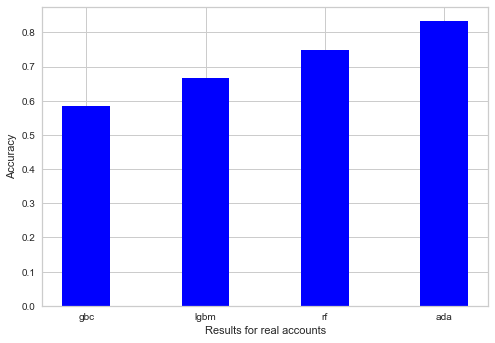

In [24]:
import matplotlib.pyplot as plt

 
# creating the bar plot
plt.bar(['gbc','lgbm','rf','ada'], [ac1,ac2,ac3,ac4], color ='blue',
        width = 0.4)
 
plt.xlabel("Results for real accounts")
plt.ylabel("Accuracy")
plt.show()

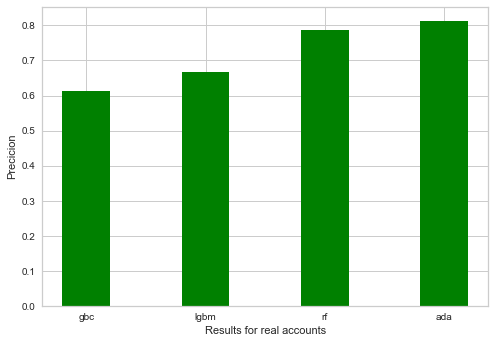

In [25]:
plt.bar(['gbc','lgbm','rf','ada'], [p1,p2,p3,p4], color ='green',
        width = 0.4)
 
plt.xlabel("Results for real accounts")
plt.ylabel("Precicion")
plt.show()

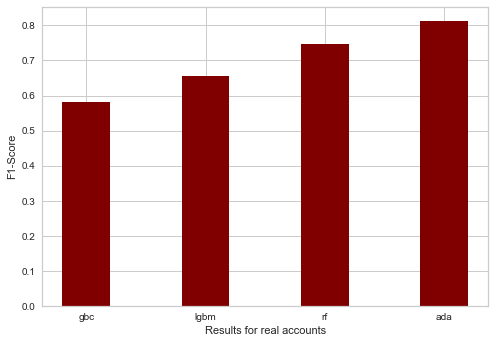

In [26]:
plt.bar(['gbc','lgbm','rf','ada'], [f1,f2,f3,f4], color ='maroon',
        width = 0.4)
 
plt.xlabel("Results for real accounts")
plt.ylabel("F1-Score")
plt.show()

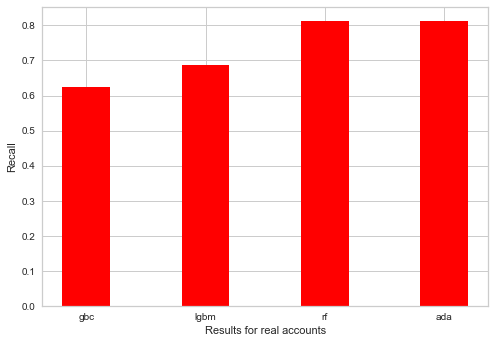

In [27]:
plt.bar(['gbc','lgbm','rf','ada'], [r1,r2,r3,r4], color ='red',
        width = 0.4)
 
plt.xlabel("Results for real accounts")
plt.ylabel("Recall")
plt.show()